In [8]:
%pip install matplotlib seaborn pandas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

Note: you may need to restart the kernel to use updated packages.


In [9]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [10]:
alunos_df = pd.read_csv("/home/diogo/Documentos/estacio/analise-de-dados/dados/alunos.csv")
responsaveis_df = pd.read_csv("/home/diogo/Documentos/estacio/analise-de-dados/dados/responsavel.csv")

In [11]:
# Exibe uma prévia dos dados

print ("Previa dos dados dos alunos: ")
display(alunos_df.head())

print("Prévia dos dados dos responsáveis: ")
display(responsaveis_df.head())

Previa dos dados dos alunos: 


,id,nome,sobrenome,idade,graduacao,competidor,responsavel,matricula,cancelamento
0,1,Lucas,Silva,34,Marrom,True,True,2024-01-01,NaN
1,2,Maria,Oliveira,25,Roxa,True,True,2024-01-01,NaN
2,3,Ana,Santos,18,Verde,True,True,2024-01-01,NaN
3,4,Carlos,Pereira,15,Verde,True,True,2024-01-01,NaN
4,5,João,Costa,22,Laranja,True,True,2024-01-01,NaN


Prévia dos dados dos responsáveis: 


,id,nome,sobrenome,responsavel_por,media_salarial,mora_no_bairro
0,1,Lucas,Silva,"[30, 29]",4000.0,True
1,2,Maria,Oliveira,[15],3800.0,True
2,3,Ana,Santos,[14],3600.0,True
3,4,Carlos,Pereira,[25],3400.0,True
4,5,João,Costa,"[28, 17]",3200.0,True


In [12]:
# Converter a coluna 'responsavel_por' de string para listas
responsaveis_df["responsavel_por"] = responsaveis_df["responsavel_por"].apply(ast.literal_eval)

# Expandir a coluna 'responsavel_por' para criar uma relação 1-para-1 entre responsáveis e IDs de alunos
responsaveis_expandido = responsaveis_df.explode("responsavel_por").rename(columns={"responsavel_por": "id_aluno"})

# Realizar o merge entre os DataFrames usando o 'id' do aluno
dados_combinados = pd.merge(
    alunos_df,
    responsaveis_expandido,
    left_on="id",          # ID do aluno no DataFrame de alunos
    right_on="id_aluno"    # ID do aluno no DataFrame expandido de responsáveis
)

# Exibir os dados combinados
print("Dados combinados:")
display(dados_combinados.head())

Dados combinados:


,id_x,nome_x,sobrenome_x,idade,graduacao,competidor,responsavel,matricula,cancelamento,id_y,nome_y,sobrenome_y,id_aluno,media_salarial,mora_no_bairro
0,4,Carlos,Pereira,15,Verde,True,True,2024-01-01,NaN,11,Lucas,Ribeiro,4,2000.0,True
1,7,Pedro,Alves,15,Laranja,True,True,2024-01-01,NaN,9,Roberto,Gomes,7,2400.0,True
2,9,Roberto,Gomes,14,Vermelha,True,True,2024-01-01,NaN,9,Roberto,Gomes,9,2400.0,True
3,10,Mariana,Martins,17,Amarela,True,True,2024-01-01,NaN,17,Carlos,Dias,10,1800.0,True
4,11,Lucas,Ribeiro,16,Amarela,True,True,2024-01-01,NaN,14,Letícia,Lima,11,2200.0,True


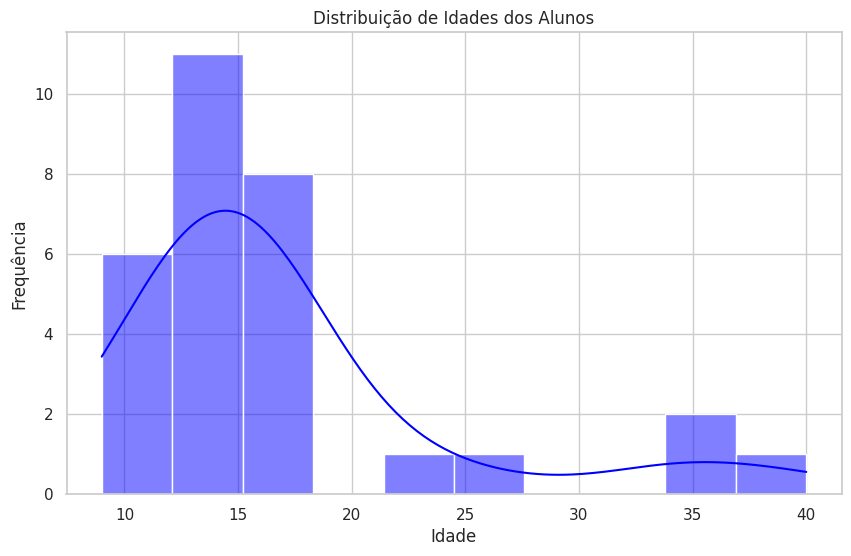

/tmp/ipykernel_20293/2120044315.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=graduacao_counts.index, y=graduacao_counts.values, palette="viridis")


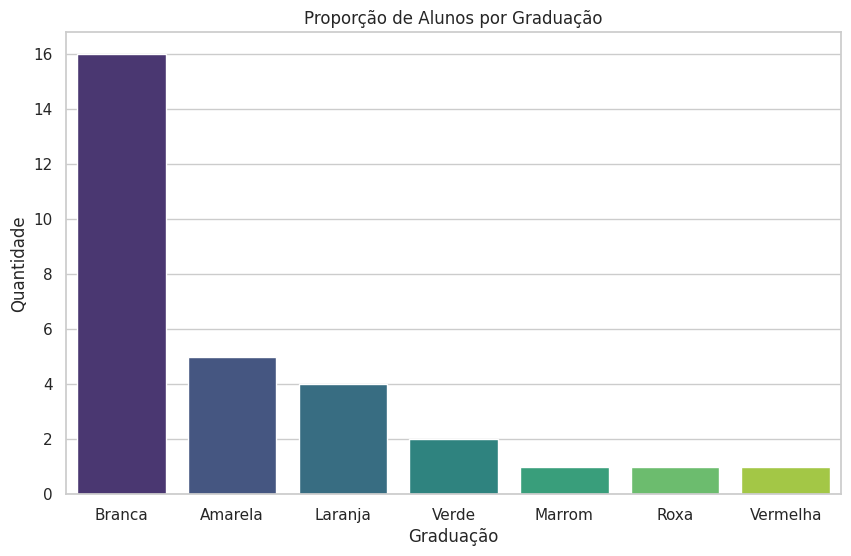

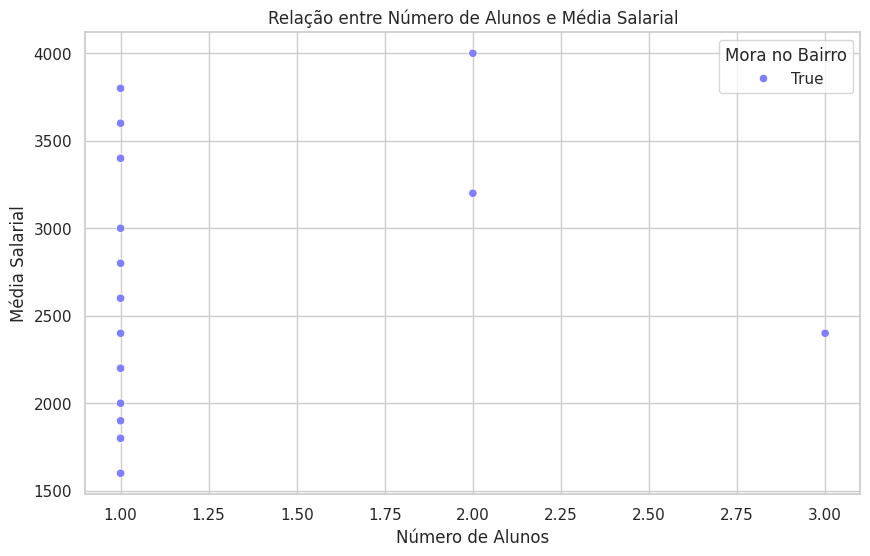


Estatísticas descritivas dos responsáveis:


,media_salarial,quantidade_alunos
count,20.000000,20.000000
mean,2565.000000,1.200000
std,722.040238,0.523148
min,1600.000000,1.000000
25%,1975.000000,1.000000
50%,2400.000000,1.000000
75%,3050.000000,1.000000
max,4000.000000,3.000000


In [13]:
# Criação do histograma de idades
plt.figure(figsize=(10, 6))
sns.histplot(alunos_df["idade"], bins=10, kde=True, color="blue")
plt.title("Distribuição de Idades dos Alunos")
plt.xlabel("Idade")
plt.ylabel("Frequência")
plt.savefig("../image/histograma_idades.png")
plt.show()

# Contagem de graduados por faixa
graduacao_counts = alunos_df["graduacao"].value_counts()

# Gráfico de barras para proporção de graduados
plt.figure(figsize=(10, 6))
sns.barplot(x=graduacao_counts.index, y=graduacao_counts.values, palette="viridis")
plt.title("Proporção de Alunos por Graduação")
plt.xlabel("Graduação")
plt.ylabel("Quantidade")
plt.savefig("../image/proporcao_graduacao.png")
plt.show()

# Cálculo do número de alunos por responsável
responsaveis_df["quantidade_alunos"] = responsaveis_df["responsavel_por"].apply(len)

# Gráfico de dispersão: Número de alunos x Média Salarial
plt.figure(figsize=(10, 6))
sns.scatterplot(data=responsaveis_df, x="quantidade_alunos", y="media_salarial", hue="mora_no_bairro", palette="cool")
plt.title("Relação entre Número de Alunos e Média Salarial")
plt.xlabel("Número de Alunos")
plt.ylabel("Média Salarial")
plt.legend(title="Mora no Bairro", loc="upper right")
plt.savefig("../image/relacao_alunos_salarial.png")
plt.show()

# Estatísticas descritivas com informações adicionais
print("\nEstatísticas descritivas dos responsáveis:")
display(responsaveis_df[["media_salarial", "quantidade_alunos"]].describe())

Prévia da análise combinada:


,id_y,idade_media_alunos,media_salarial_responsavel
0,1,9.5,4000.0
1,2,11.0,3800.0
2,3,12.0,3600.0
3,4,12.0,3400.0
4,5,13.0,3200.0


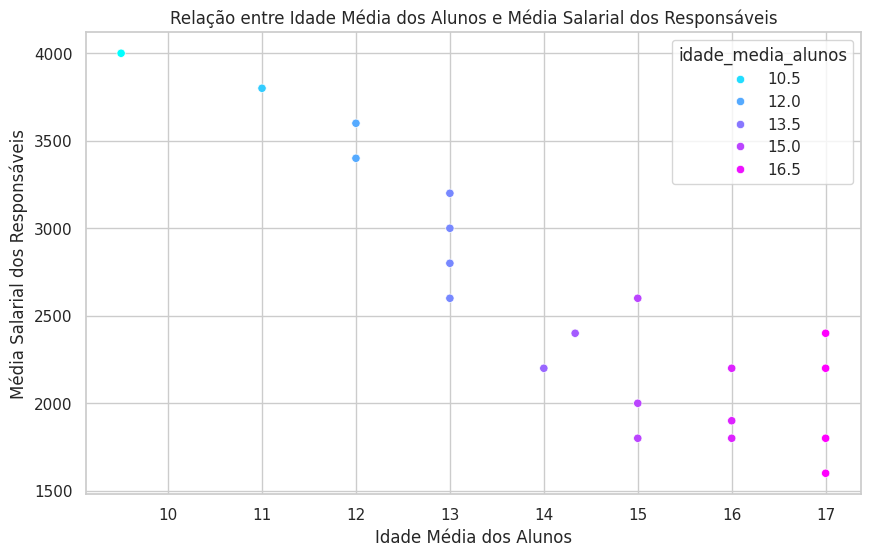

In [14]:
# Análise combinada: cálculo de idade média e média salarial por responsável
analise_df = dados_combinados.groupby("id_y").agg({
    "idade": "mean",          # Idade média dos alunos
    "media_salarial": "first" # Média salarial (não muda por responsável)
}).reset_index()

# Renomeia colunas para clareza
analise_df.rename(columns={"idade": "idade_media_alunos", "media_salarial": "media_salarial_responsavel"}, inplace=True)

# Exibição da análise combinada
print("Prévia da análise combinada:")
display(analise_df.head())

# Gráfico de dispersão: Idade Média dos Alunos x Média Salarial dos Responsáveis
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=analise_df,
    x="idade_media_alunos",
    y="media_salarial_responsavel",
    hue="idade_media_alunos",
    palette="cool"
)
plt.title("Relação entre Idade Média dos Alunos e Média Salarial dos Responsáveis")
plt.xlabel("Idade Média dos Alunos")
plt.ylabel("Média Salarial dos Responsáveis")
plt.savefig("../image/relacao_idade_media_salarial.png")
plt.show()